In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os as os
import libpysal as lps
import spreg
from libpysal.weights import Queen, KNN
import esda
np.random.seed(1728)

# Adjust directory accordingly
os.chdir('C:\\Users\\wesch\\OneDrive\\20 Spring Summer Urban Science Intensive\\nyconnect\\data')

# Load datasets
mobile_rooftop = pd.read_csv("./Cellular_Towers/Mobile_Telecommunication_Franchise_Poletop_Installation_Locations_2018.csv")
census_tracts = gpd.read_file("./2010_Census_Tracts/geo_export_0ca1f0a1-f242-497a-9f86-91b88fc18647.shp")

#### Kernel Density Estimation

Instead of plotting all of cellular towers installed on rooftops as points, we can create a probability of point density over space as a way of measuring how densely packed rooftop cellular towers are. They can also be an approximaion of signal strength and mobile coverage across the city. 

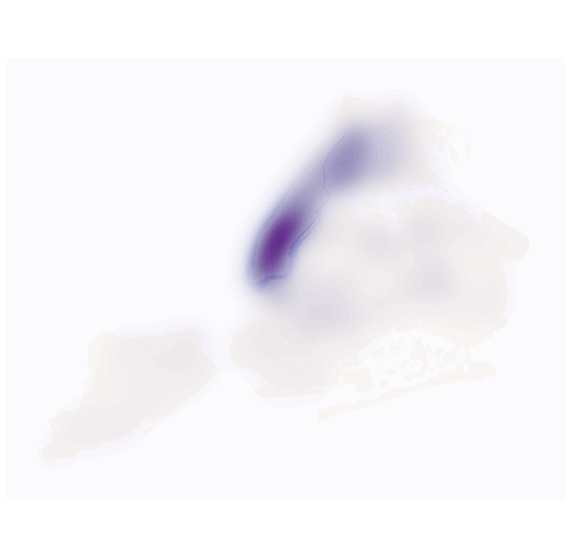

In [46]:
# setting up plot
f, ax = plt.subplots(1, figsize = (10,10))

# KDE Plot

sns.kdeplot(mobile_rooftop["Longitude"], mobile_rooftop["Latitude"], ax = ax, n_levels = 50,
                shade=True, alpha = 1, cmap = "Purples")
census_tracts.plot(ax = ax, color = "#f1e2cc", alpha = 0.2)
ax.set_axis_off()
plt.axis("equal")
plt.show()

#### DBScan

We can also use DBScan to detect anomalies and clusters.

In [66]:
from sklearn.cluster import dbscan
from sklearn.cluster import DBSCAN

In [54]:
lbls

0       0
1       0
2       0
3       0
4       0
       ..
8025    0
8026    0
8027    0
8028    0
8029    0
Length: 8030, dtype: int64

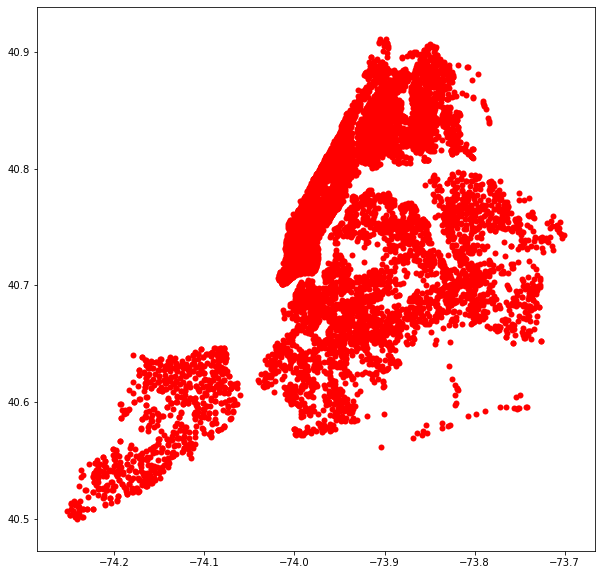

In [55]:
cs, lbls = dbscan(mobile_rooftop[["Longitude", "Latitude"]], eps = 500, min_samples=100)
lbls = pd.Series(lbls, index = mobile_rooftop.index)

f, ax = plt.subplots(1, figsize = (10,10))
noise = mobile_rooftop.loc[lbls== -1, ["Longitude", "Latitude"]]
ax.scatter(noise["Longitude"], noise["Latitude"], c = "grey", s = 5, linewidths=0)
ax.scatter(mobile_rooftop.loc[mobile_rooftop.index.difference(noise.index), "Longitude"],
           mobile_rooftop.loc[mobile_rooftop.index.difference(noise.index), "Latitude"],
           c = "red", linewidth = 0)
plt.show()

In [64]:
mobile_data = mobile_rooftop.iloc[:,1:3]
mobile_data = mobile_data.values

eps = 1529.5799999999986 , min_samples = 80 , num_detected_points = 328


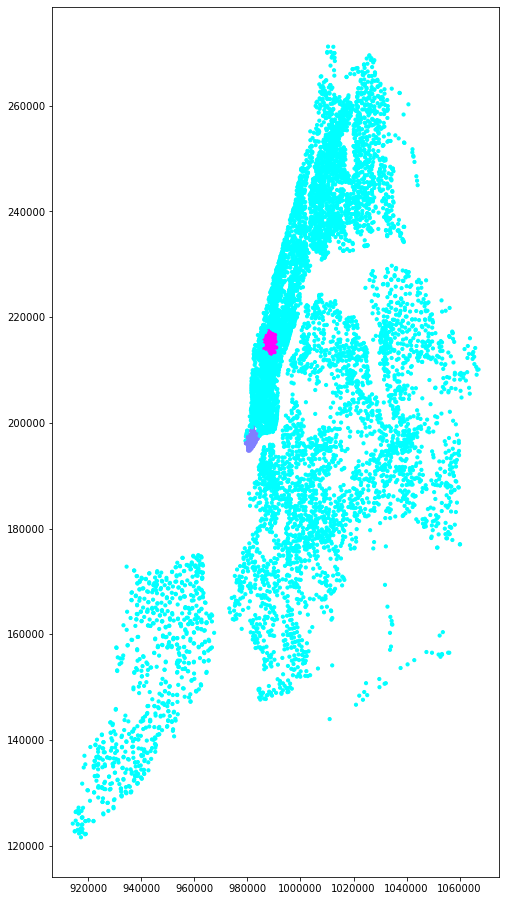

eps = 3295.3802131789635 , min_samples = 280 , num_detected_points = 523


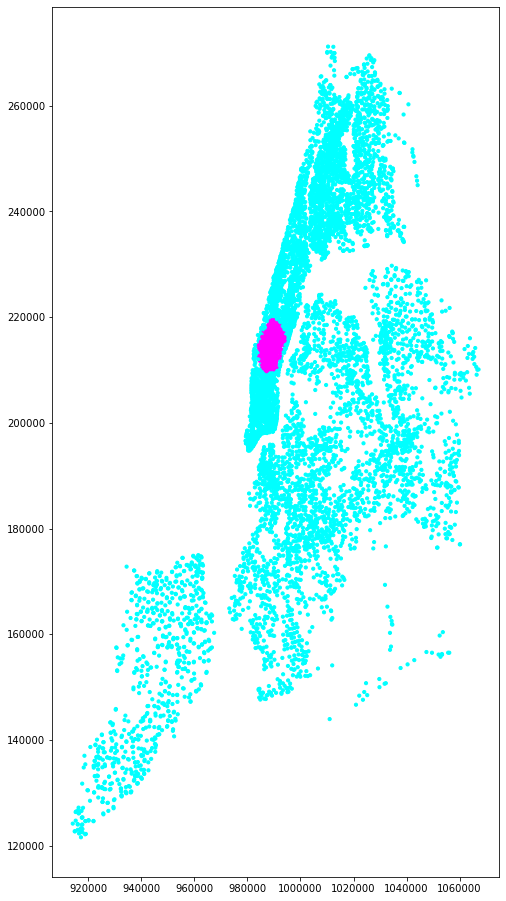

In [67]:
total_num_samples = len(mobile_data[:,0])
max_eps = max(np.max(mobile_data[:,0])-np.min(mobile_data[:,0]),np.max(mobile_data[:,1])-np.min(mobile_data[:,1]))

for eps in np.logspace(np.log10(max_eps)-3,np.log10(max_eps),10):
    for min_samples in range(40,800,40):
        db = DBSCAN(eps, min_samples).fit(mobile_data)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
            print ("eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0]))
            plt.figure(figsize=(8,16))
            plt.scatter(mobile_data[:,0],mobile_data[:,1],c=db.labels_,s=10,cmap=plt.cm.cool)
            plt.show()